In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
datafile = "cal_housing_data.csv"

In [3]:
df=pd.read_csv(datafile)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null int64
totalRooms          20640 non-null int64
totalBedrooms       20640 non-null int64
population          20640 non-null int64
households          20640 non-null int64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome'],
      dtype='object')


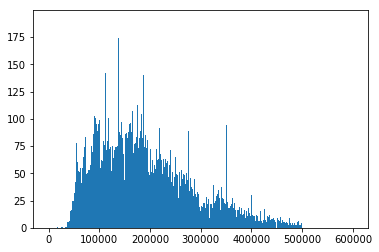

In [66]:
df = df[df['medianHouseValue']<500000]

X=df.loc[:,'longitude':'medianIncome']
y=df['medianHouseValue']
print(X.columns)
plt.hist(df.medianHouseValue,range=[0,600000],bins=600);

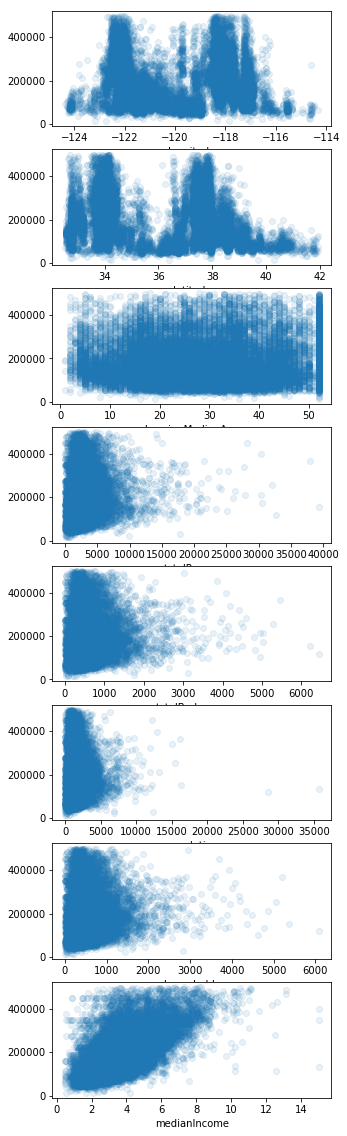

In [43]:
plt.figure(figsize=(5, 20))

for i,col in enumerate(X.columns):
    plt.subplot(len(X.columns), 1, i+1)
    plt.xlabel(col)
    plt.scatter(df[col],df.medianHouseValue,alpha=.1)

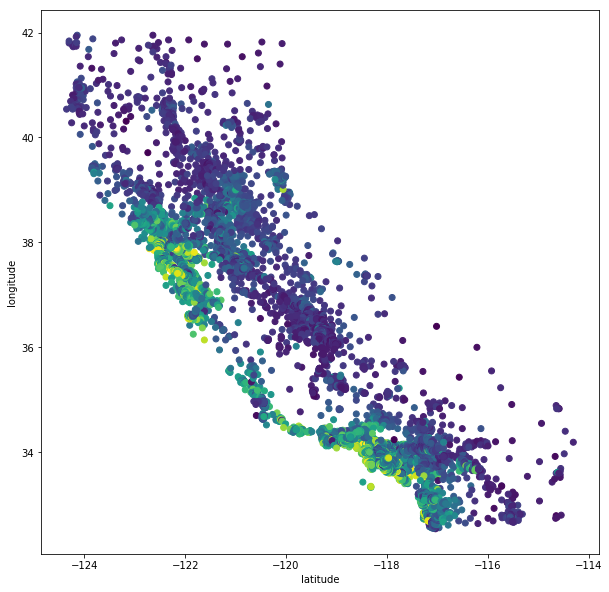

In [68]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.scatter(df.longitude,df.latitude,c=df.medianHouseValue)

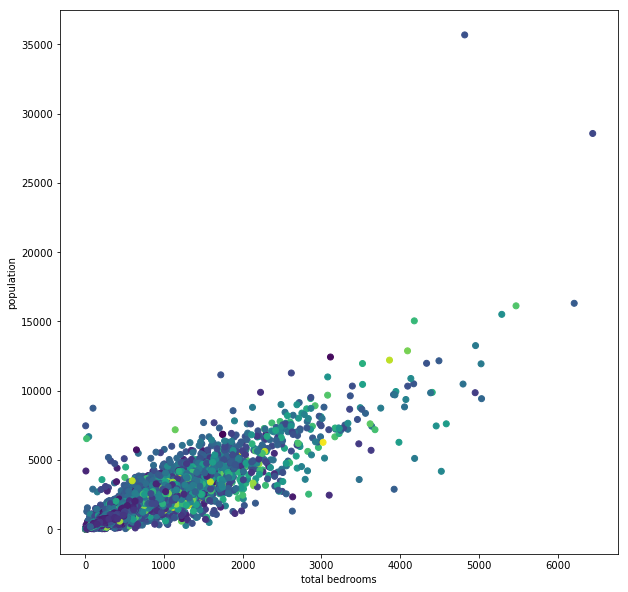

In [69]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.xlabel('total bedrooms')
plt.ylabel('population')

plt.scatter(df.totalBedrooms,df.population,c=df.medianHouseValue)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 9 columns):
longitude           19648 non-null float64
latitude            19648 non-null float64
housingMedianAge    19648 non-null int64
totalRooms          19648 non-null int64
totalBedrooms       19648 non-null int64
population          19648 non-null int64
households          19648 non-null int64
medianIncome        19648 non-null float64
medianHouseValue    19648 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [11]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
RMSE_lr

62010.025574271393

In [50]:
sorted(zip(X.columns,abs(model_lr.coef_)), key=lambda x: -x[1])

[('medianIncome', 39576.215318766517),
 ('longitude', 39408.04511687487),
 ('latitude', 38779.418351623812),
 ('housingMedianAge', 1001.9934572777365),
 ('totalBedrooms', 108.14901309250673),
 ('households', 38.068549035939064),
 ('population', 32.884495437380089),
 ('totalRooms', 8.3603901887753977)]

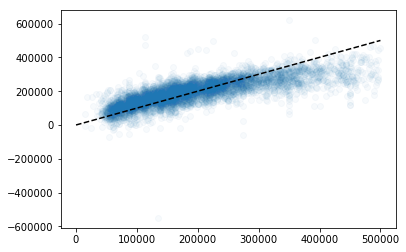

In [13]:
temp = np.linspace(0,500000,500)

plt.scatter(y_test,pred_vals_lr, alpha = .03)
plt.plot(temp,temp,'k--')

In [14]:
model_lr_log = LinearRegression(fit_intercept=True)
model_lr_log.fit(X_train, np.log(y_train))
pred_vals_lr_log = np.exp(model_lr_log.predict(X_test))
RMSE_lr_log = np.sqrt(np.sum((pred_vals_lr_log - y_test)**2)/len(y_test))
RMSE_lr_log

66399.115361212316

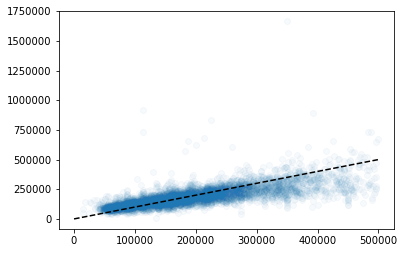

In [15]:
temp = np.linspace(0,500000,500)

plt.scatter(y_test,pred_vals_lr_log, alpha = .03)
plt.plot(temp,temp,'k--')

In [51]:
sorted(zip(X.columns,abs(model_lr_log.coef_)), key=lambda x: -x[1])

[('latitude', 0.25754076886908772),
 ('longitude', 0.25610388258664485),
 ('medianIncome', 0.20871780160941436),
 ('housingMedianAge', 0.003674697176836883),
 ('totalBedrooms', 0.00063901411421432846),
 ('population', 0.0001523072683095967),
 ('households', 0.0001325492030685955),
 ('totalRooms', 5.3176127820348544e-05)]

In [80]:
# Try with increasing number of trees
rfmodel1 = RandomForestRegressor(n_estimators = 100, max_features = 3,
                                min_samples_leaf = 5, n_jobs=4)
rfmodel1.fit(X_train,y_train)
pred_vals_rf1 = rfmodel1.predict(X_test)

In [81]:
RMSE_rf1 = np.sqrt(np.sum((pred_vals_rf1 - y_test)**2)/len(y_test))
RMSE_rf1

47148.858789588878

In [82]:
sorted(zip(X.columns,abs(rfmodel1.feature_importances_)), key=lambda x: -x[1])

[('medianIncome', 0.43935808473375948),
 ('longitude', 0.1837591504340278),
 ('latitude', 0.18265630720624212),
 ('housingMedianAge', 0.048592036812311751),
 ('population', 0.046323723394515202),
 ('totalRooms', 0.03925338255249089),
 ('totalBedrooms', 0.030223880800434432),
 ('households', 0.029833434066218439)]

In [83]:
# Try with different max features
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 3,
                                min_samples_leaf = 4, n_jobs=4)
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)

In [84]:
RMSE_rf2 = np.sqrt(np.sum((pred_vals_rf2 - y_test)**2)/len(y_test))
RMSE_rf2

46540.842376255445

In [85]:
sorted(zip(X.columns,abs(rfmodel2.feature_importances_)), key=lambda x: -x[1])

[('medianIncome', 0.43168502986272994),
 ('longitude', 0.18625137688720875),
 ('latitude', 0.17778693665467288),
 ('housingMedianAge', 0.050419851928305393),
 ('population', 0.04886070382207322),
 ('totalRooms', 0.041024037314563694),
 ('households', 0.032398948389980017),
 ('totalBedrooms', 0.031573115140466457)]

In [61]:
# Try with increasing number of iterations
gbmodel1 = GradientBoostingRegressor(n_estimators = 100, 
                                     learning_rate = .1,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)
pred_vals_gb1 = gbmodel1.predict(X_test)

In [62]:
RMSE_gb1 = np.sqrt(np.sum((pred_vals_gb1 - y_test)**2)/len(y_test))
RMSE_gb1

46621.011909537126

In [63]:
# Try with different depths
gbmodel2 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .1,
                                    max_depth = 7)
gbmodel2.fit(X_train,y_train)
pred_vals_gb2 = gbmodel2.predict(X_test)

In [64]:
RMSE_gb2 = np.sqrt(np.sum((pred_vals_gb2 - y_test)**2)/len(y_test))
RMSE_gb2

42747.737043339141

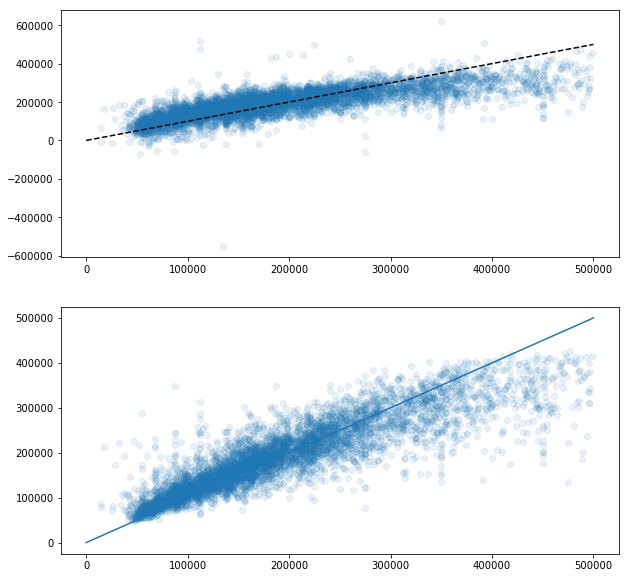

In [65]:
plt.figure(figsize=(10, 10))

temp = np.linspace(0,500000,500)

plt.subplot(2, 1, 1)
plt.scatter(y_test,pred_vals_lr, alpha = .1)
plt.plot(temp,temp,'k--')

plt.subplot(2, 1, 2)
plt.scatter(y_test,pred_vals_rf2, alpha = .1)
plt.plot(temp,temp)
